# PID and Fuzzy logic with Op-Amp

- Differential input resistance: Differential input resistance is the equivalent resistance 
that can be measured at either the inverting or non-inverting input terminal with the 
other terminal connected to ground. 
- Output resistance: Output resistance is the equivalent resistance that can be 
measured between the output terminal of the op-amp and the ground. 
- Large signal voltage gain: Since the op-amp difference voltage between two input 
terminals, the voltage gain of the amplifier is defined as the ratio of output voltage to 
differential input voltage. That is: 
    $ A = \frac{V_o}{V_{id}} $
Because output signal amplitude is much larger than the input signal, the voltage 
gain is commonly called large signal voltage gain. 
- Common mode rejection ratio (CMRR): It is defined as the ratio of differential gain 
to common mode gain. A high CMRR helps to reject common mode signals such as 
noise successfully. <br>
$ \text{CMRR} = \frac{A_d} {A_{cm}} $ <br>
$ \text{CMRR} (dB) = 20log (\dfrac{A_d} {A_{cm}}) $

- Slew rate (SR): It is defined as the maximum rate of change of output voltage per 
unit time and it is expressed in volts/microseconds. <br>
$ SR = \dfrac{dV_o}{dt} \biggr\rvert _{max}$

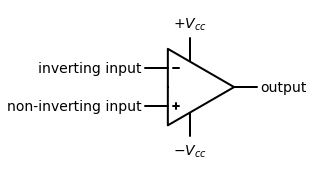

In [44]:
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
op1 = d.add(elm.Opamp())
d.add(elm.Line().at(op1.in1).length(d.unit/4).left().label('inverting input', 'lft'))
d.add(elm.Line().at(op1.in2).length(d.unit/4).left().label('non-inverting input', 'lft'))
d.add(elm.Line().at(op1.out).length(d.unit/4).right().label('output', 'rgt'))
d.add(elm.Line().at(op1.vd).length(d.unit/4).up().label('$+V_{cc}$', ofst=-1.5, loc='left'))
d.add(elm.Line().at(op1.vs).length(d.unit/4).down().label('$-V_{cc}$', ofst=-1.5, loc='right'))
d.draw()

## Modelling of Plant 

A second order underdamped plant to be described in terms of its input output behaviour as follows:
$$ \dfrac{v_{out}}{v_{in}} = \dfrac{K_1}{s^2+2\eta\omega_n s +\omega_n^2} $$ 

$$ K_1 = \dfrac{A_f}{R_{16}R_{17}C_4C_5} $$
$$ A_f = 1 + \dfrac{R_{16}}{R_{18}} $$
$$ \eta = \dfrac{3-A_f}{2} $$
$$ \omega_n = \dfrac{1}{\sqrt{R_{16}R_{17}C_4C_5}} $$

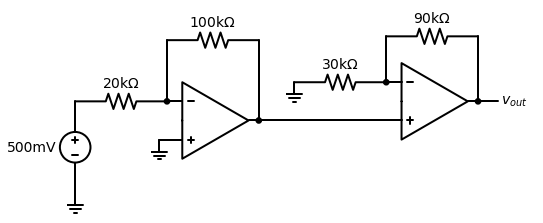

In [2]:
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
d.add(elm.Ground)
d.add(elm.SourceV(label='500mV'))

d.add(elm.Resistor('right', label='20k$\Omega$'))
Vin = d.add(elm.Dot)
d.add(elm.Line(l=.5))
O1 = d.add(elm.Opamp(anchor='in1'))
d.add(elm.Line('left', l=.75, xy=O1.in2))
d.add(elm.Ground)
d.add(elm.Line('up', xy=Vin.start, l=2))
d.add(elm.Resistor('right', label='100k$\Omega$'))
d.add(elm.Line('down', toy=O1.out))
d.add(elm.Dot)
d.add(elm.Line('right', xy=O1.out, l=5))
O2 = d.add(elm.Opamp(anchor='in2'))
Vin2 = d.add(elm.Line('left', l=.5, xy=O2.in1))
d.add(elm.Dot)
d.add(elm.Resistor('left', label='30k$\Omega$'))
d.add(elm.Ground)
d.add(elm.Line('up', xy=Vin2.end, l=1.5))
d.add(elm.Resistor('right', label='90k$\Omega$'))
d.add(elm.Line('down', toy=O2.out))
d.add(elm.Dot)
d.add(elm.Line('right', xy=O2.out, l=1, rgtlabel='$v_{out}$'))
d.draw()